In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras import backend as K
from tensorflow.keras.applications import InceptionV3

# dimensions of our images.
img_width, img_height = 256, 256

train_data_dir = 'Dataset Planet/Train'
test_data_dir = 'Dataset Planet/Test'
epochs = 15
batch_size = 16

base_model = InceptionV3(include_top=False, input_shape=(256, 256, 3))

# Add some layers on top of the base model for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# for layer in base_model.layers:
#     layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit(train_generator, epochs=epochs, batch_size=batch_size)

model.save_weights('planet.h5')

Found 104 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - 88s 10s/step - loss: 1.9398 - accuracy: 0.5577
Epoch 2/15
7/7 [==============================] - 71s 10s/step - loss: 0.3786 - accuracy: 0.8077
Epoch 3/15
7/7 [==============================] - 69s 10s/step - loss: 0.3558 - accuracy: 0.8750
Epoch 4/15
7/7 [==============================] - 69s 10s/step - loss: 0.2265 - accuracy: 0.9135
Epoch 5/15
7/7 [==============================] - 69s 11s/step - loss: 0.3778 - accuracy: 0.8654
Epoch 6/15
7/7 [==============================] - 69s 9s/step - loss: 0.2054 - accuracy: 0.9135
Epoch 7/15
7/7 [==============================] - 71s 10s/step - loss: 0.0907 - accuracy: 0.9615
Epoch 8/15
7/7 [==============================] - 71s 10s/step - loss: 0.3535 - accuracy: 0.9038
Epoch 9/15
7/7 [==============================] - 71s 10s/step - loss: 0.1079 - accuracy: 0.9615
Epoch 10/15
7/7 [==============================

In [31]:
result = model.predict(test_generator)

5/5 [==============================] - 38s 6s/step


In [32]:
y_test = test_generator.classes

In [33]:
import numpy as np
y_pred = np.argmax(result, axis=-1)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      1.00      0.27        12
           1       0.00      0.00      0.00        64

    accuracy                           0.16        76
   macro avg       0.08      0.50      0.14        76
weighted avg       0.02      0.16      0.04        76

0.15789473684210525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


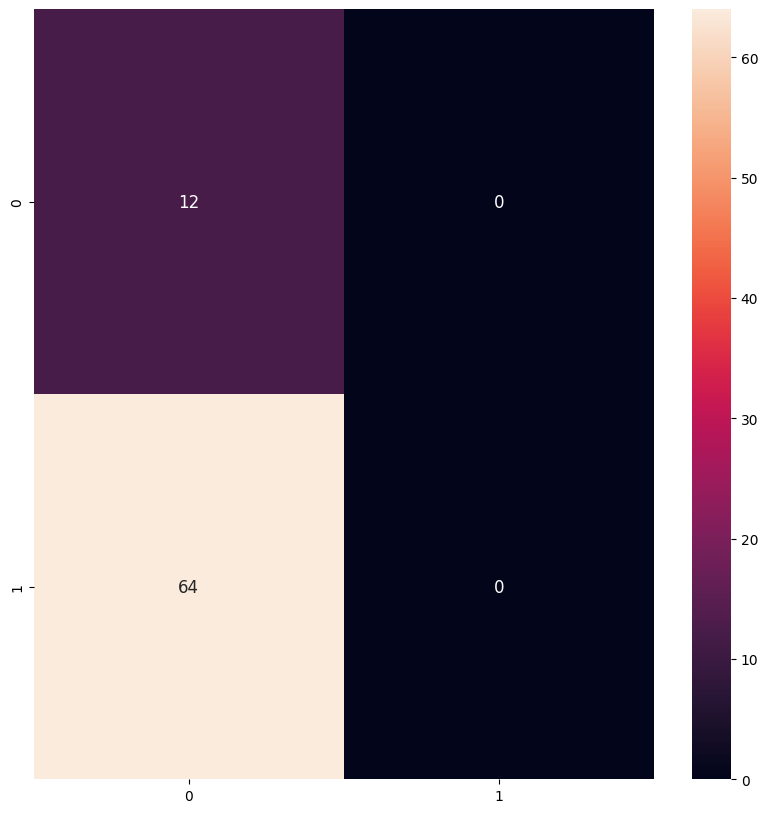

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()